<a href="https://colab.research.google.com/github/sunami20/Data-Science-2025/blob/main/Assingment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                       
#  .                                     # **Assignment - 8**

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Reading the real cancer dataset..")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/datasets/Breast_Cancer_Wisconsin_Dataset.csv')

Reading the real cancer dataset..
Mounted at /content/drive


# **3. test new patients**

In [5]:
print("Converting M-1(Malignant Cancer) and B - 0 (Benign Cancer)")

# convert diagnosis column to number (M=1, B=0)
data['diagnosis_numeric'] = data['diagnosis'].map({'M':1, 'B':0})

# Select only the most important features (make it simple)

important_features=[
    'concave points_mean',
    'smoothness_se',
    'concavity_se',
    'symmetry_se',
    'perimeter_mean'
]

# Create simple dataset

x = data[important_features]
y = data['diagnosis_numeric']

print(f"x (measurments): {x.shape}")
print(f"y (diagnosis): {y.shape}")

Converting M-1(Malignant Cancer) and B - 0 (Benign Cancer)
x (measurments): (569, 5)
y (diagnosis): (569,)


# **Train and Test Split**

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"Training: {len(x_train)} patients (computer will learn from those)'")
print(f"Testing: {len(x_test)} patients (computer will learn from those)'")


# show some training examples
print('\n Training Examples (computer learns from these)')
print(x_train.head())


Training: 455 patients (computer will learn from those)'
Testing: 114 patients (computer will learn from those)'

 Training Examples (computer learns from these)
     concave points_mean  smoothness_se  concavity_se  symmetry_se  \
68               0.04375       0.009549      0.303800      0.04197   
181              0.14960       0.004253      0.038720      0.01798   
63               0.02180       0.008738      0.043120      0.04192   
248              0.01615       0.007189      0.010810      0.02158   
60               0.01290       0.007514      0.007665      0.04183   

     perimeter_mean  
68            58.79  
181          142.70  
63            59.20  
248           68.01  
60            64.55  


# **1. Find the best Tree Depth**

In [8]:
# create our ya
ya = DecisionTreeClassifier(
    max_depth =5,
    random_state=20
)

print("Ya with traning data...")
#Train the ya model
ya.fit(x_train, y_train)


Ya with traning data...


DecisionTreeClassifier(max_depth=5, random_state=20)

# **2. Calculate all metrics**

In [ ]:
# Make predictions on the test set
y_pred = ya.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8947
Precision: 0.8444
Recall: 0.8837
F1-Score: 0.8636

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.84      0.88      0.86        43

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



# **4. Anylyze Confusion Matrix**

[[64  7]
 [ 5 38]]
Correct: 102
wrong: 12


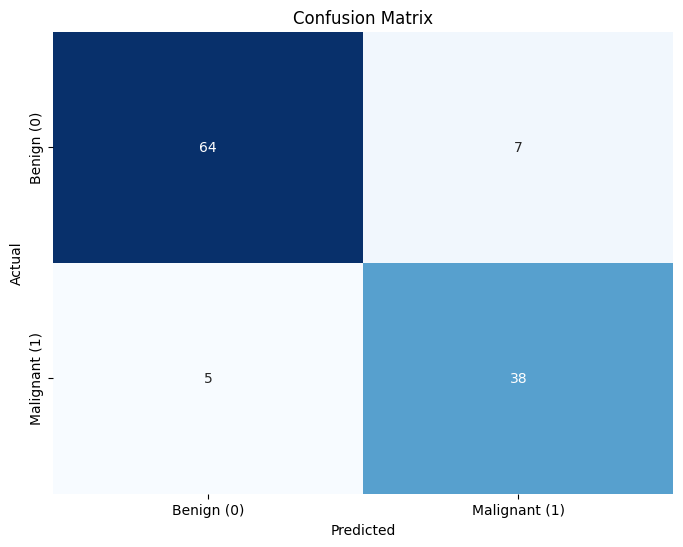

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

print(cm)
print(f"Correct: {cm[0, 0]+ cm[1,1]}")
print(f"wrong: {cm[0, 1]+ cm[1,0]}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()